In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow

In [ ]:
mlflow.set_tracking_uri("http://localhost:5000")
client = mlflow.MlflowClient()

EXPERIMENT_NAME = "ICA_12-15-23_104748"

def get_runs(experiment_name):
    experiment = client.get_experiment_by_name(experiment_name)
    if experiment is None:
        print("No experiment found")
        return []
    runs = client.search_runs([experiment.experiment_id])
    return runs


runs = get_runs(EXPERIMENT_NAME)
runs

In [39]:
def get_mlflow_data(runs):
    run_data = []

    # Loop through each run and extract data
    for run in runs:
        run_id = run.info.run_id
        # Fetch detailed run info
        detailed_run = mlflow.get_run(run_id)
        # Extract metrics and parameters
        metrics = detailed_run.data.metrics
        params = detailed_run.data.params
        # Create a combined dictionary
        combined_data = {**metrics, **params}
        combined_data['run_id'] = run_id
        # Append to the run data list
        run_data.append(combined_data)

    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(run_data)

    return df

data = get_mlflow_data(runs)
del runs

data.head()

,training_score,training_mean_squared_error,training_mean_absolute_error,RMSE,training_r2_score,training_root_mean_squared_error,copy_X,fit_intercept,norm,n_jobs,oxide,model,positive,run_id
0,1.0,4.870067e-29,5.381395e-15,1.553070,1.0,6.978586e-15,True,True,3,None,K2O,Geometric,False,99c842a008f547279a042bc8d17f2e98
1,1.0,3.130335e-29,4.466881e-15,2.937151,1.0,5.594940e-15,True,True,3,None,Na2O,Parabolic,False,95824903016b4a3e8f7d58fc3a2b315b
2,1.0,6.380674e-28,2.022026e-14,2.994637,1.0,2.526000e-14,True,True,1,None,CaO,Parabolic,False,7d216d15b3f84f2cb4c53a0df4d4643f
3,1.0,1.978456e-28,1.116610e-14,2.912232,1.0,1.406576e-14,True,True,1,None,MgO,Exponential,False,0627fc7cd61e4ff08dfc32189fd05287
4,1.0,2.012318e-27,3.466075e-14,3.419664,1.0,4.485887e-14,True,True,1,None,FeOT,Geometric,False,9473d1a1fb0d4bad915e099debd780e5


In [40]:
data["RMSE"]

0     1.553070
1     2.937151
2     2.994637
3     2.912232
4     3.419664
5     4.770348
6     0.475378
7    10.249075
Name: RMSE, dtype: float64

In [41]:
ICA_paper_rmse = {
    "SiO2": 6.7,
    "TiO2": 0.6,
    "Al2O3": 4.4,
    "FeOT": 2.2,
    "MgO": 3.0,
    "CaO": 1.0,
    "Na2O": 0.6,
    "K2O": 0.4,
}

paper_rmses = pd.DataFrame.from_dict(ICA_paper_rmse, orient="index", columns=["RMSE"])
paper_rmses['oxide'] = paper_rmses.index

In [42]:
# # Creating a bar plot with separate bars for each compositional range
# plt.figure(figsize=(12, 6))

# # Creating a grouped bar chart
# sns.barplot(x='oxide', y='RMSE', data=data)
# sns.barplot(x='oxide', y='paper_rmse', data=paper_rmses, alpha=0.5)

# plt.title('Comparison of Best RMSE and Paper RMSE Grouped by Oxide and Compositional Range')
# plt.xlabel('Oxide')
# plt.ylabel('RMSE')
# plt.show()

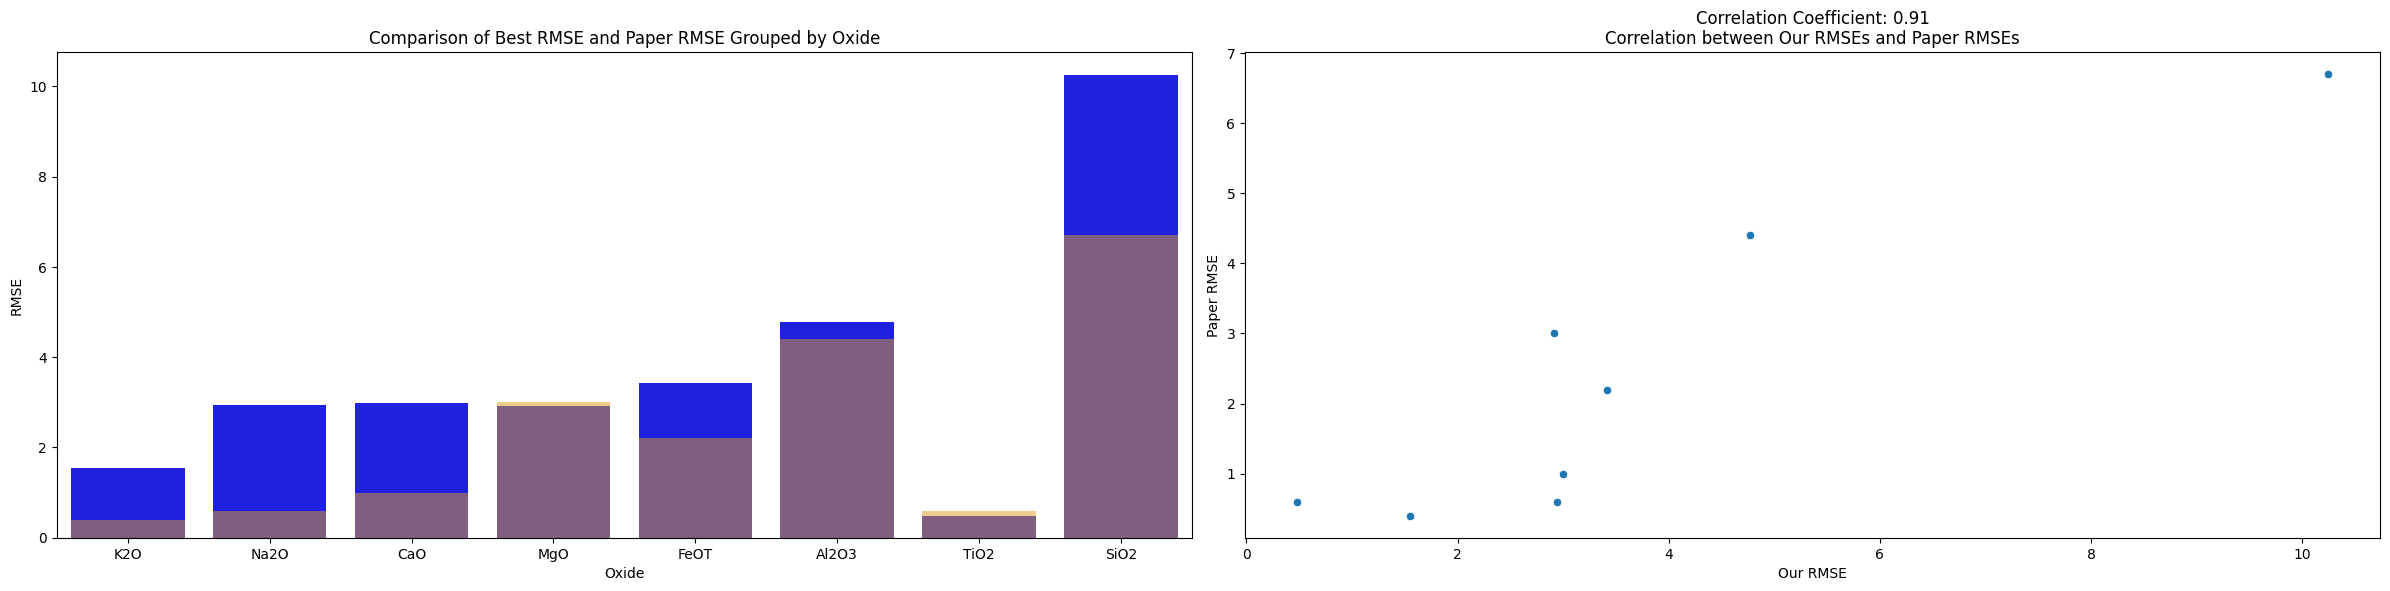

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Merging the datasets on 'oxide'
merged_data = pd.merge(data, paper_rmses, on='oxide', suffixes=('_ours', '_paper'))

# Creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Grouped Bar Chart
sns.barplot(x='oxide', y='RMSE_ours', data=merged_data, ax=axes[0], color='blue')
sns.barplot(x='oxide', y='RMSE_paper', data=merged_data, ax=axes[0], color='orange', alpha=0.5)
axes[0].set_title('Comparison of Best RMSE and Paper RMSE Grouped by Oxide')
axes[0].set_xlabel('Oxide')
axes[0].set_ylabel('RMSE')

# Scatter Plot for Correlation
sns.scatterplot(x='RMSE_ours', y='RMSE_paper', data=merged_data, ax=axes[1])
axes[1].set_title('Correlation between Our RMSEs and Paper RMSEs')
axes[1].set_xlabel('Our RMSE')
axes[1].set_ylabel('Paper RMSE')

# Calculate the correlation coefficient
correlation = merged_data['RMSE_ours'].corr(merged_data['RMSE_paper'])
axes[1].text(x=0.5, y=1.05, s=f"Correlation Coefficient: {correlation:.2f}", 
             fontsize=12, ha='center', va='bottom', transform=axes[1].transAxes)

plt.tight_layout()
plt.show()


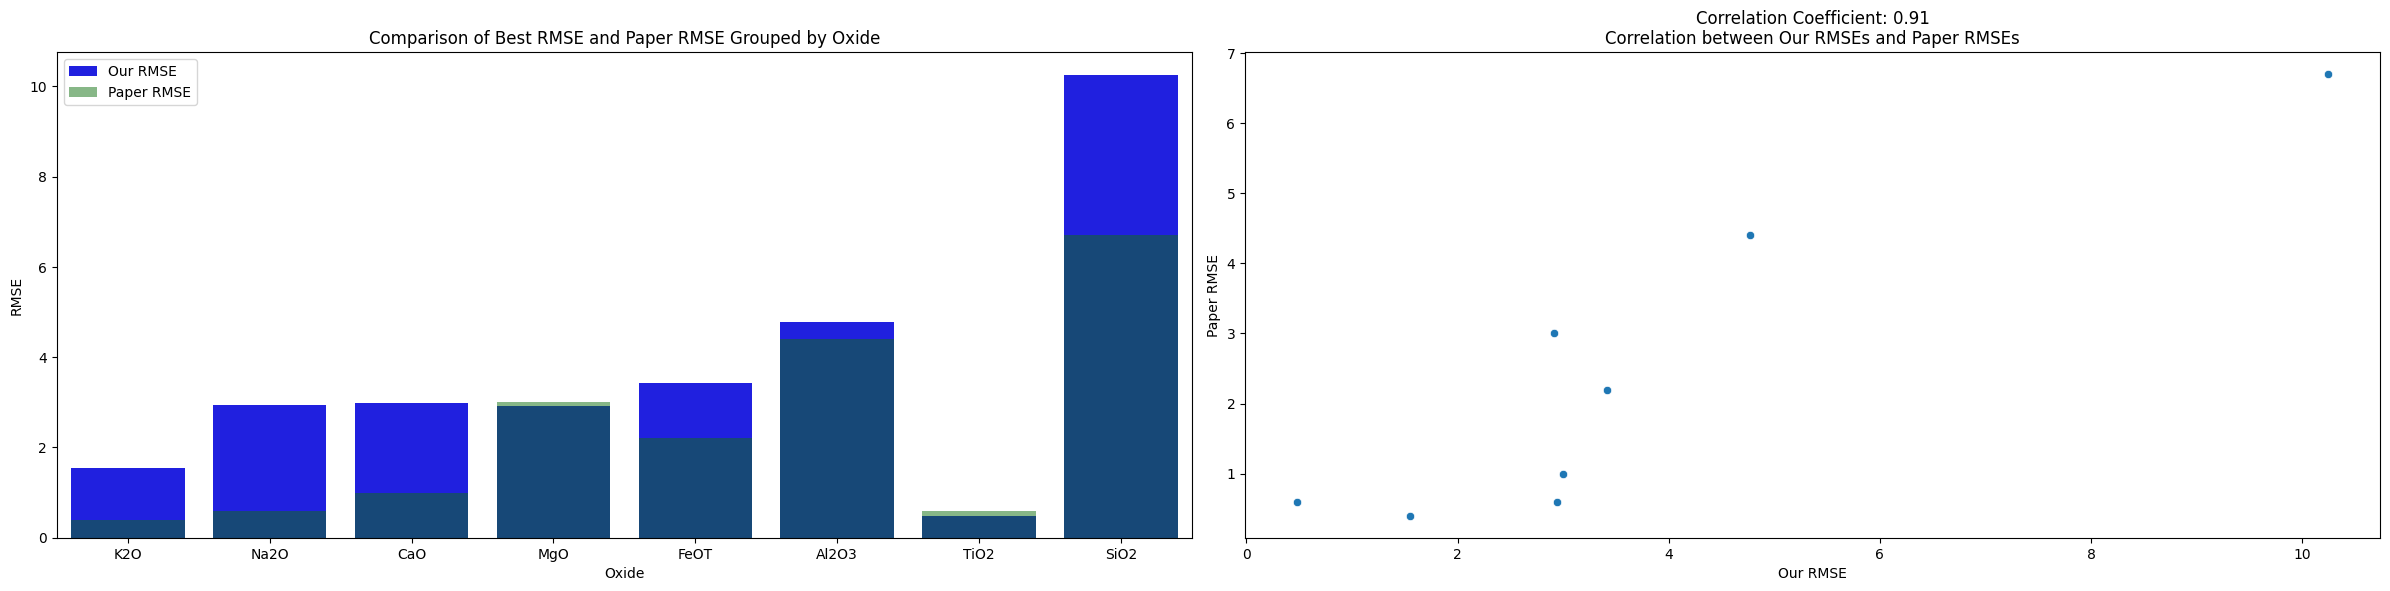

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Merging the datasets on 'oxide'
merged_data = pd.merge(data, paper_rmses, on='oxide', suffixes=('_ours', '_paper'))

# Creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Grouped Bar Chart
bar1 = sns.barplot(x='oxide', y='RMSE_ours', data=merged_data, ax=axes[0], color='blue', label='Our RMSE')
bar2 = sns.barplot(x='oxide', y='RMSE_paper', data=merged_data, ax=axes[0], color='green', alpha=0.5, label='Paper RMSE')
axes[0].set_title('Comparison of Best RMSE and Paper RMSE Grouped by Oxide')
axes[0].set_xlabel('Oxide')
axes[0].set_ylabel('RMSE')
axes[0].legend()

# Scatter Plot for Correlation
sns.scatterplot(x='RMSE_ours', y='RMSE_paper', data=merged_data, ax=axes[1])
axes[1].set_title('Correlation between Our RMSEs and Paper RMSEs')
axes[1].set_xlabel('Our RMSE')
axes[1].set_ylabel('Paper RMSE')

# Calculate the correlation coefficient
correlation = merged_data['RMSE_ours'].corr(merged_data['RMSE_paper'])
axes[1].text(x=0.5, y=1.05, s=f"Correlation Coefficient: {correlation:.2f}", 
             fontsize=12, ha='center', va='bottom', transform=axes[1].transAxes)

plt.tight_layout()
plt.show()


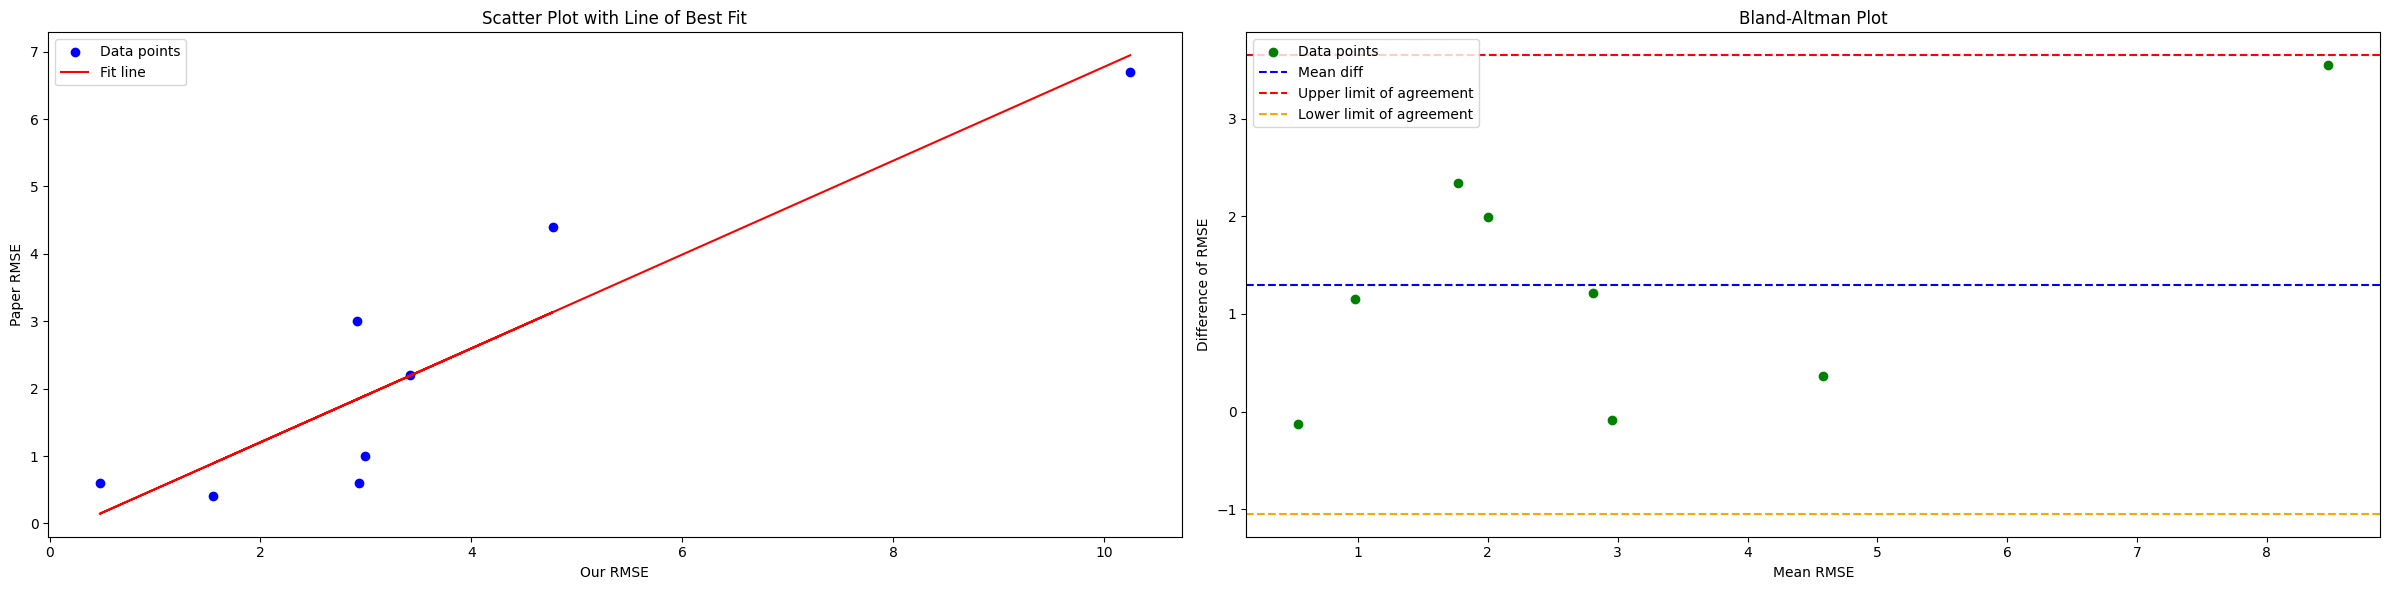

(2.876381634544637,
 0.023774170359200136,
 1.3545419850043872,
 40.96384667383415,
 0.8343873322283724)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, linregress
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Placeholder for loading data - this would be replaced by the actual data loading code
# data = pd.read_csv('path_to_your_data.csv')
# paper_rmses = pd.read_csv('path_to_paper_data.csv')

# For illustration purposes, let's create some synthetic data resembling the data and paper RMSEs
# Let's assume 'oxide' is a common column in both your data and the paper's data.

# Paired t-test
t_stat, p_value = ttest_rel(merged_data['RMSE_ours'], merged_data['RMSE_paper'])

# Mean Absolute Error (MAE)
mae = mean_absolute_error(merged_data['RMSE_ours'], merged_data['RMSE_paper'])

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((merged_data['RMSE_paper'] - merged_data['RMSE_ours']) / merged_data['RMSE_ours'])) * 100

# Regression line for scatter plot
slope, intercept, r_value, p_value_reg, std_err = linregress(merged_data['RMSE_ours'], merged_data['RMSE_paper'])

# Prepare Bland-Altman plot data
mean_rmse = (merged_data['RMSE_ours'] + merged_data['RMSE_paper']) / 2
diff_rmse = merged_data['RMSE_ours'] - merged_data['RMSE_paper']
mean_diff = np.mean(diff_rmse)
std_diff = np.std(diff_rmse)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Scatter plot with regression line
axes[0].scatter(merged_data['RMSE_ours'], merged_data['RMSE_paper'], color='blue', label='Data points')
axes[0].plot(merged_data['RMSE_ours'], intercept + slope * merged_data['RMSE_ours'], color='red', label='Fit line')
axes[0].set_title('Scatter Plot with Line of Best Fit')
axes[0].set_xlabel('Our RMSE')
axes[0].set_ylabel('Paper RMSE')
axes[0].legend()

# Bland-Altman plot
axes[1].scatter(mean_rmse, diff_rmse, color='green', label='Data points')
axes[1].axhline(mean_diff, color='blue', linestyle='--', label='Mean diff')
axes[1].axhline(mean_diff + 1.96 * std_diff, color='red', linestyle='--', label='Upper limit of agreement')
axes[1].axhline(mean_diff - 1.96 * std_diff, color='orange', linestyle='--', label='Lower limit of agreement')
axes[1].set_title('Bland-Altman Plot')
axes[1].set_xlabel('Mean RMSE')
axes[1].set_ylabel('Difference of RMSE')
axes[1].legend()

plt.tight_layout()
plt.show()

# Output the results of the statistical tests
t_stat, p_value, mae, mape, r_value**2
